In [494]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [495]:
train = pd.read_csv('train.csv', index_col="id")

In [496]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [497]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [498]:
# vemos que la media del precio de los diamantes es 
train["price"].mean()

3956.0205166234086

In [499]:
train["price"].std()

4009.646466861757

In [500]:
# analizamos los nulos en nuesto data set. nuestro data set esta limpio y sin nulos
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [501]:
# miramos la correlación de price con el resto de columnas
corr = train.corr()

In [502]:
# vemos claramente que la correlación más alta es con carat , x, y, z , pero que hay una alta colinearidad con x,y,z 
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.026242,0.183268,0.975538,0.944843,0.967968,0.921776
depth,0.026242,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.013715
table,0.183268,-0.296991,1.000000,0.197330,0.184213,0.156565,0.127199
x,0.975538,-0.026495,0.197330,1.000000,0.967690,0.985338,0.884862
y,0.944843,-0.030529,0.184213,0.967690,1.000000,0.960890,0.859062
z,0.967968,0.095624,0.156565,0.985338,0.960890,1.000000,0.873913
price,0.921776,-0.013715,0.127199,0.884862,0.859062,0.873913,1.000000


In [503]:
# miramos que exista una correlación alta, vemos que el carat es la columna que tiene una correlación más alta.

corr[corr.abs() >.8]

,carat,depth,table,x,y,z,price
carat,1.000000,NaN,NaN,0.975538,0.944843,0.967968,0.921776
depth,NaN,1.0,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x,0.975538,NaN,NaN,1.000000,0.967690,0.985338,0.884862
y,0.944843,NaN,NaN,0.967690,1.000000,0.960890,0.859062
z,0.967968,NaN,NaN,0.985338,0.960890,1.000000,0.873913
price,0.921776,NaN,NaN,0.884862,0.859062,0.873913,1.000000


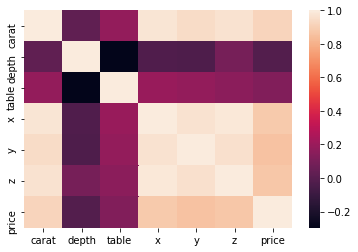

In [504]:
# miramos la correlación con un heat map
sns.heatmap(corr)

In [505]:
# miramos la covarianza
train.cov()

,carat,depth,table,x,y,z,price
carat,0.225870,0.017883,0.195434,0.520974,0.518052,0.320334,1.756551e+03
depth,0.017883,2.056059,-0.955535,-0.042690,-0.050503,0.095477,-7.885453e+01
table,0.195434,-0.955535,5.034673,0.497532,0.476859,0.244621,1.144389e+03
x,0.520974,-0.042690,0.497532,1.262657,1.254480,0.770976,3.986802e+03
y,0.518052,-0.050503,0.476859,1.254480,1.330972,0.771918,3.973881e+03
z,0.320334,0.095477,0.244621,0.770976,0.771918,0.484871,2.439985e+03
price,1756.550693,-78.854529,1144.389352,3986.801780,3973.880743,2439.984727,1.607726e+07


In [506]:
#vemos mas especificamente como es la correlación con el precio, por lo que la correlación entre el carat(peso del diamante en quilates) y el precio es muy alta
corr["price"].sort_values()

depth   -0.013715
table    0.127199
y        0.859062
z        0.873913
x        0.884862
carat    0.921776
price    1.000000
Name: price, dtype: float64

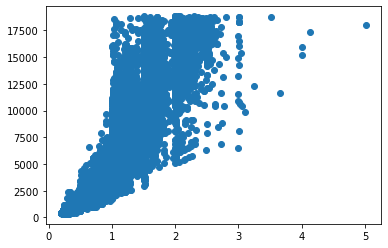

In [507]:
plt.scatter(data["carat"],data["price"]);

In [508]:
#quitamos las columnas depth y table por no tener correlación con nuestro modelo
data = train.drop(columns=["z","y"])
data

,carat,cut,color,clarity,depth,table,x,price
id,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,10957
...,...,...,...,...,...,...,...,...
40450,0.40,Very Good,F,SI1,62.9,58.0,4.69,687
40451,0.95,Premium,H,SI1,62.9,58.0,6.26,3984
40452,0.63,Ideal,F,VS2,61.2,56.0,5.56,2182


In [509]:

data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,x,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.50,62.3,55.0,5.11,1845,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.54,63.6,60.0,7.30,10164,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.32,61.7,60.0,6.95,5513,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1.20,62.1,55.0,6.83,5174,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1.73,61.2,60.0,7.67,10957,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.40,62.9,58.0,4.69,687,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
40451,0.95,62.9,58.0,6.26,3984,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
40452,0.63,61.2,56.0,5.56,2182,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [510]:
data.corr()

,carat,depth,table,x,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.026242,0.183268,0.975538,0.921776,0.031302,-0.166458,0.118855,0.012417,-0.139292,...,0.104924,0.162625,0.179561,-0.114571,0.060502,0.265900,-0.062971,-0.037712,-0.164522,-0.137088
depth,0.026242,1.000000,-0.296991,-0.026495,-0.013715,0.133119,-0.023625,-0.199274,0.027770,-0.032645,...,0.027796,0.025541,0.022496,-0.029033,0.038731,0.010260,-0.024037,-0.012706,-0.021182,-0.020975
table,0.183268,-0.296991,1.000000,0.197330,0.127199,0.178468,-0.547676,0.333112,0.118990,0.008681,...,0.010073,0.019282,0.038860,-0.079824,0.057326,0.095227,-0.030163,-0.010586,-0.073488,-0.061015
x,0.975538,-0.026495,0.197330,1.000000,0.884862,0.027740,-0.165750,0.128933,0.008005,-0.135140,...,0.099136,0.147831,0.163097,-0.125948,0.077101,0.269256,-0.060182,-0.034291,-0.182014,-0.147321
price,0.921776,-0.013715,0.127199,0.884862,1.000000,-0.003807,-0.099148,0.098971,0.008941,-0.101838,...,0.060604,0.097363,0.081630,-0.050047,0.006569,0.127707,-0.010470,0.000848,-0.092695,-0.051899
cut_Good,0.031302,0.133119,0.178468,0.027740,-0.003807,1.000000,-0.259772,-0.186484,-0.170933,0.006399,...,-0.009818,0.006209,0.013416,-0.033062,0.054637,0.042824,-0.015226,-0.021888,-0.037420,-0.040185
cut_Ideal,-0.166458,-0.023625,-0.547676,-0.165750,-0.099148,-0.259772,1.000000,-0.477107,-0.437320,0.001787,...,-0.024278,-0.011110,-0.036771,0.106660,-0.082462,-0.110591,0.034321,0.016941,0.089552,0.075133
cut_Premium,0.118855,-0.199274,0.333112,0.128933,0.098971,-0.186484,-0.477107,1.000000,-0.313941,-0.013255,...,0.023546,0.004945,0.017028,-0.056158,0.024986,0.066794,-0.012991,0.023272,-0.054784,-0.060691
cut_Very Good,0.012417,0.027770,0.118990,0.008005,0.008941,-0.170933,-0.437320,-0.313941,1.000000,0.015257,...,0.003840,0.000164,0.007853,-0.032783,0.032387,0.007458,-0.007187,-0.017493,-0.006083,0.014867
color_E,-0.139292,-0.032645,0.008681,-0.135140,-0.101838,0.006399,0.001787,-0.013255,0.015257,1.000000,...,-0.199517,-0.157149,-0.109796,-0.043001,0.006547,0.006653,-0.029601,0.027250,-0.003244,0.012831


In [539]:
# separamos el modelo entre train y test con un test size de 0.25
y = data["price"]
X = data.drop(columns="price", axis="columsn")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
X_train.shape

(30341, 21)

In [540]:
# miramos el shape de nuestras columnas
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30341, 21), (10114, 21), (30341,), (10114,))

In [541]:
# empezamos haciendo una regresion lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [542]:
y_pred = lr.predict(X_test)

In [543]:
y_pred

array([   87.04190615,  2990.24668414,  4423.18278184, ...,
        2171.70593794,  5106.88420861, 10220.30301095])

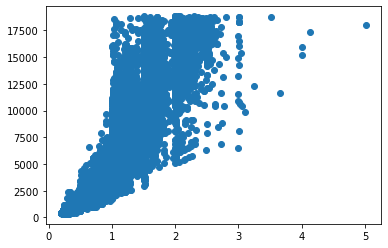

In [544]:
plt.scatter(data["carat"],data["price"]);


In [545]:
r2_score(y_test,y_pred)

0.9206313950699374

In [546]:
# nuestro primer entrenamiento del modelo es un rmse de 1490 dolares por diamante
mean_squared_error(y_test, y_pred)**0.5
rmse

1490.6437129035698

### Separamos el modelo entre train y test con un test size de 0.20

In [547]:
# separamos el modelo entre train y test con un test size de 0.20
y = data["price"]
X = data.drop(columns="price")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)


In [548]:
#miramos el shape
X_train.shape , X_test.shape

((32364, 21), (8091, 21))

In [549]:
y_train.shape, y_test.shape

((32364,), (8091,))

In [550]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [551]:
y_pred = lr.predict(X_test)

In [552]:
(y_pred)

array([15528.77394343,   888.58267924,  6270.55075279, ...,
        -245.01084072,  1767.49140801, 10806.22943973])

In [553]:
r2_score(y_test,y_pred)

0.9215079576614557

In [554]:
mean_squared_error(y_test, y_pred)**0.5
rmse

1490.6437129035698

In [555]:
mse_train = mean_squared_error(y_train, lr.predict(X_train))
mse_test = mean_squared_error(y_test, lr.predict(X_test))

In [556]:
mse_train**0.5

1135.0527404244178

In [557]:
mse_test**0.5

1117.7321756831639

### abrimos el csv predict

In [558]:
predict = pd.read_csv('predict.csv',index_col="id" )

In [559]:
predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [560]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 0 to 13484
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [561]:
predict_dropped = predict.drop(columns=["z","y"])
predict_dropped

,carat,cut,color,clarity,depth,table,x
id,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88
1,1.23,Ideal,H,SI1,61.0,56.0,6.96
2,0.33,Ideal,I,IF,61.8,55.0,4.46
3,0.51,Premium,D,VS2,58.0,60.0,5.29
4,0.40,Premium,E,VS2,62.2,59.0,4.71
...,...,...,...,...,...,...,...
13480,0.30,Very Good,I,SI1,62.2,57.0,4.25
13481,1.01,Ideal,J,VS2,62.3,55.0,6.40
13482,0.33,Ideal,F,VVS1,61.9,55.0,4.43


In [564]:
predict_dummies=pd.get_dummies(predict_dropped, drop_first=True)
predict_dummies

,carat,depth,table,x,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.45,62.8,58.0,4.88,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.23,61.0,56.0,6.96,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.33,61.8,55.0,4.46,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0.51,58.0,60.0,5.29,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.40,62.2,59.0,4.71,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.30,62.2,57.0,4.25,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
13481,1.01,62.3,55.0,6.40,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13482,0.33,61.9,55.0,4.43,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [565]:
X_test=predict_dummies

In [566]:
y_pred= lr.predict(X_test)

In [567]:
predict_dummies['price'] = y_pred_predict

In [568]:
predict_dummies

,carat,depth,table,x,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
id,,,,,,,,,,,,,,,,,,,,,
0,0.45,62.8,58.0,4.88,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1229.273864
1,1.23,61.0,56.0,6.96,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7112.070051
2,0.33,61.8,55.0,4.46,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,521.170172
3,0.51,58.0,60.0,5.29,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1740.798139
4,0.40,62.2,59.0,4.71,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,925.514575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.30,62.2,57.0,4.25,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,426.667829
13481,1.01,62.3,55.0,6.40,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,5306.279606
13482,0.33,61.9,55.0,4.43,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,547.381253


### Exportamos el csv con id y price

In [188]:
predict_dropped["price"].to_csv("data predict.csv", index_label="id")

### DecisionTreeClassifier

In [265]:
from sklearn.tree import DecisionTreeClassifier

In [368]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=["price"]), data["price"])

In [369]:
X_train.shape, X_test.shape

((30341, 4), (10114, 4))

In [370]:
y_train.shape, y_test.shape

((30341,), (10114,))

In [371]:
tree = DecisionTreeClassifier(max_depth=3)

In [372]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [373]:
from sklearn.tree import plot_tree

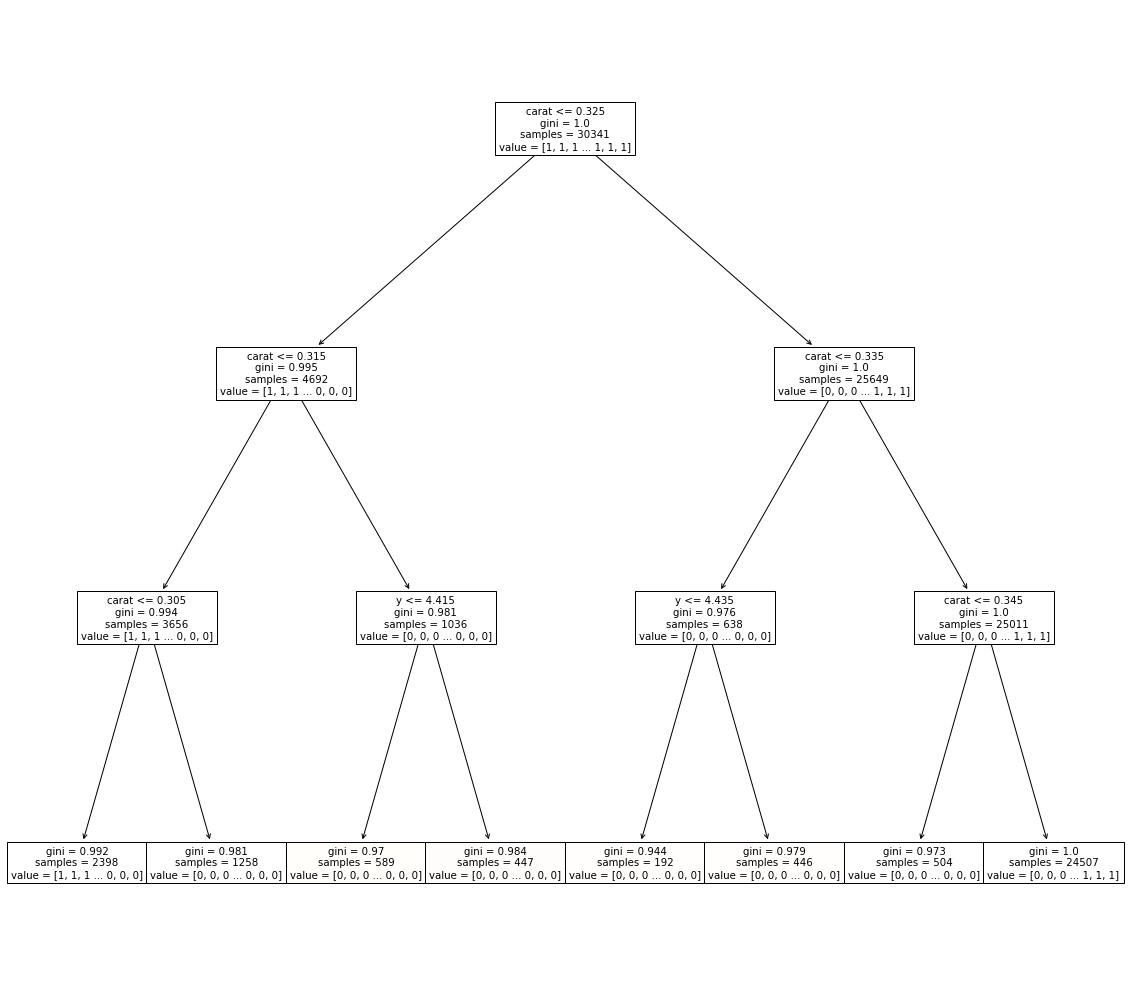

In [374]:
plt.figure(figsize=(20,18))
plot_tree(tree, feature_names=X_train.columns, filled=True);

In [375]:
y_pred = tree.predict(X_test)

In [376]:
#vemos que el error es mucho más alto
mean_squared_error(y_test, y_pred)**0.5

5079.713806470364

In [377]:
accuracy_score(y_test,y_pred)

0.011864741941862765